In [1]:
pip install "jupyterlab>=3" "ipywidgets>=7.6" "plotly==5.3.1" "cufflinks"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance
import numpy as np
import pandas as pd
import pandas
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import cufflinks as cf
cf.set_config_file(offline=True)

import warnings
warnings.filterwarnings("ignore")

In [3]:
from ActMng import AccountManager

In [4]:
starting_capital = 200000
allocation = 0.7

symbol = 'DJI'

long_trend_days = 14
short_trend_days = 7

In [17]:
def fetch_data(symbol:str='DJI', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
df = fetch_data(symbol)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

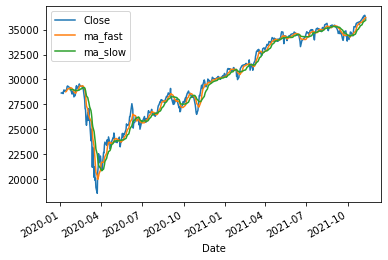

In [18]:
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].plot()

In [19]:
df['trade_direction'] = np.sign(fast_trend - slow_trend)
df

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2020-01-03,28634.900391,28634.900391,NaN,NaN,NaN
2020-01-06,28703.400391,28703.400391,NaN,NaN,NaN
2020-01-07,28583.699219,28583.699219,NaN,NaN,NaN
2020-01-08,28745.099609,28745.099609,NaN,NaN,NaN
2020-01-09,28956.900391,28956.900391,NaN,NaN,NaN
...,...,...,...,...,...
2021-11-04,36124.199219,36124.199219,35876.014509,35698.093471,1.0
2021-11-05,36327.898438,36327.898438,35957.585938,35771.886161,1.0
2021-11-08,36432.199219,36432.199219,36092.085938,35855.714565,1.0


In [20]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']

In [21]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-23,29160.099609,29160.099609,29165.428292,28965.207031,1.0,Long
2020-01-24,28989.699219,28989.699219,29172.571150,28990.549805,1.0,None
2020-01-27,28535.800781,28535.800781,29101.942801,28978.578404,1.0,None
2020-01-28,28722.800781,28722.800781,29019.828683,28988.514230,1.0,None
2020-01-29,28734.400391,28734.400391,28932.157366,28987.750000,-1.0,Short
...,...,...,...,...,...,...
2021-11-04,36124.199219,36124.199219,35876.014509,35698.093471,1.0,None
2021-11-05,36327.898438,36327.898438,35957.585938,35771.886161,1.0,None
2021-11-08,36432.199219,36432.199219,36092.085938,35855.714565,1.0,None


In [22]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(symbol=symbol,trades_df=df,starting_capital=starting_capital,allocation_amount=allocation)
results = trading_strategy.run()

In [23]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-01-23,29160.099609,29160.099609,29165.428292,28965.207031,1.0,Long,199999.000000,60030.521875,4.80,4.80,1.0
2020-01-24,28989.699219,28989.699219,29172.571150,28990.549805,1.0,None,199181.078125,60030.521875,4.80,0.00,0.0
2020-01-27,28535.800781,28535.800781,29101.942801,28978.578404,1.0,None,197002.365625,60030.521875,4.80,0.00,0.0
2020-01-28,28722.800781,28722.800781,29019.828683,28988.514230,1.0,None,197899.965625,60030.521875,4.80,0.00,0.0
2020-01-29,28734.400391,28734.400391,28932.157366,28987.750000,-1.0,Short,197953.643750,336453.453633,-4.82,-9.62,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,36124.199219,36124.199219,35876.014509,35698.093471,1.0,None,228111.840469,65914.185977,4.49,0.00,0.0
2021-11-05,36327.898438,36327.898438,35957.585938,35771.886161,1.0,None,229026.449961,65914.185977,4.49,0.00,0.0
2021-11-08,36432.199219,36432.199219,36092.085938,35855.714565,1.0,None,229494.760469,65914.185977,4.49,0.00,0.0
2021-11-09,36320.000000,36320.000000,36176.300223,35917.335938,1.0,None,228990.985977,65914.185977,4.49,0.00,0.0


In [24]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-01-23,DJI,2020-01-23 00:00:00,At Market Open,BUY,MARKET,29160.099609,4.80,1.0
2020-01-29,DJI,2020-01-29 00:00:00,At Market Open,SELL,MARKET,28734.400391,4.80,1.0
2020-01-29,DJI,2020-01-29 00:00:00,At Market Open,SELL,MARKET,28734.400391,4.82,1.0
2020-02-10,DJI,2020-02-10 00:00:00,At Market Open,BUY,MARKET,29276.800781,4.82,1.0
2020-02-10,DJI,2020-02-10 00:00:00,At Market Open,BUY,MARKET,29276.800781,4.67,1.0
...,...,...,...,...,...,...,...,...
2021-10-04,DJI,2021-10-04 00:00:00,At Market Open,SELL,MARKET,34002.898438,4.56,1.0
2021-10-04,DJI,2021-10-04 00:00:00,At Market Open,SELL,MARKET,34002.898438,4.57,1.0
2021-10-13,DJI,2021-10-13 00:00:00,At Market Open,BUY,MARKET,34377.800781,4.57,1.0
2021-10-13,DJI,2021-10-13 00:00:00,At Market Open,BUY,MARKET,34377.800781,4.49,1.0


absolute_return_tf : % 14.000000000000002
CAGR_tf: % 8.0
information_ratio_tf:  0.5221


<AxesSubplot:>

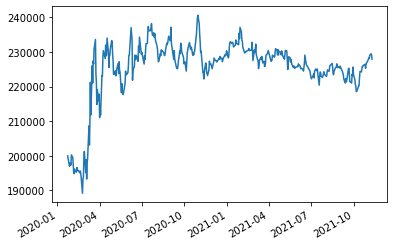

In [25]:
#Todo:
r_df = results['result_df']
# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital
print(f"absolute_return_tf : % {np.round(absolute_return_tf ,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf =  ((r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df)))-1
print(f"CAGR_tf: % {np.round(CAGR_tf ,2)*100}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std())*((252)**0.5)
print(f"information_ratio_tf:  {np.round(information_ratio_tf,4)}")

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.plot()
# Todo

absolute_return_bh : % 23.73
CAGR_bh: % 13.0
information_ratio_bh: % 0.5692


<AxesSubplot:>

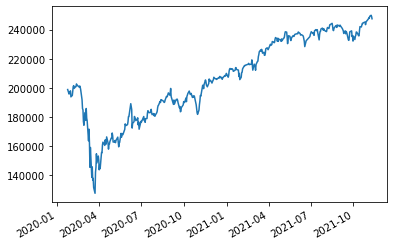

In [26]:
#Todo:
r_df = results['result_df']
# Calculate the Absolute Return of a buy-and-hold strategy in the same period
absolute_return_bh = ((r_df.Close.iloc[-1] - r_df.Open.iloc[0]) /  r_df.Open.iloc[0])*100
print(f"absolute_return_bh : % {np.round(absolute_return_bh ,2)}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_bh = ((r_df.Close.iloc[-1]/ r_df.Open.iloc[0])**(252/len(df)))-1
print(f"CAGR_bh: % {np.round(CAGR_bh ,2)*100}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_bh = (r_df.Close.pct_change().mean()/r_df.Close.pct_change().std())*((252)**0.5)
print(f"information_ratio_bh: % {np.round(information_ratio_bh,4)}")

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).plot()


absolute_return_tf : % 14.000000000000002
CAGR_tf: % 8.0
information_ratio_tf:  0.5221


<AxesSubplot:>

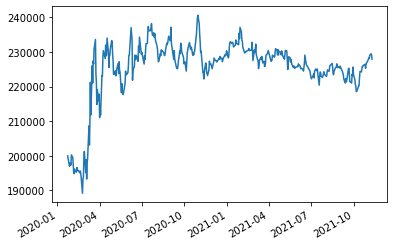

In [27]:
#Todo - optional, below:
# Copy any of the code from above to new cells below, and see how changing the symbol,
#dates and trend parameters changes the performance
# Can you beat the reference implementation?
r_df = results['result_df']
# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital
print(f"absolute_return_tf : % {np.round(absolute_return_tf ,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf =  ((r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df)))-1
print(f"CAGR_tf: % {np.round(CAGR_tf ,2)*100}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std())*((252)**0.5)
print(f"information_ratio_tf:  {np.round(information_ratio_tf,4)}")

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.plot()

In [29]:
#Todo - optional, below:
# Copy any of the code from above to new cells below, and see how changing the symbol, dates and trend parameters changes the performance
# Can you beat the reference implementation?
def khadija_assignment_2( symbol='SPY',
                          start_date='2019',
                          end_date=None,
                          starting_capital=20000,
                          allocation=0.7,
                          long_trend_days=12,
                          short_trend_days=6 ):

symbol = symbol                        
allocation = allocation
starting_capital = starting_capital 
short_trend_days = short_trend
long_trend_days = long_trend
df = fetch_data(symbol,start_date=start_date, end_date= end_date)
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].plot()

df['trade_direction'] = np.sign(fast_trend - slow_trend)


df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])
                         
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']
df_trades['trade']

df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')

trading_strategy = AccountManager(symbol=symbol,
                                  trades_df=df,
                                  starting_capital=starting_capital,
                                  allocation_amount=allocation)
results = trading_strategy.run()
results['result_df']
results['broker_orders']

r_df = results['result_df']

absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital
print(f"absolute_return_tf : % {np.round(absolute_return_tf ,2)}")
CAGR_tf =  ((r_df['account_val'].iloc[-1]/starting_capital)**(365/459))-1
print(f"CAGR_tf: % {np.round(CAGR_tf ,2)}")
information_ratio_tf = r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std()
print(f"information_ratio_tf: % {np.round(information_ratio_tf,2)}")
r_df.account_val.plot()

print('==============================================================================')

r_df = results['result_df']
absolute_return_bh = ((r_df.iloc[-1].Close - r_df.Open.iloc[0]) /  r_df.Open.iloc[0])*100
CAGR_bh = ((r_df.Close.iloc[-1]/ r_df.Open.iloc[0])**(365/(r_df.index[-1] - r_df.index[0]).days))-1
information_ratio_bh = (r_df.Close.pct_change().mean()/r_df.Close.pct_change().std())*((252)**0.5)
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).plot()

SyntaxError: unexpected EOF while parsing (<ipython-input-29-993ae24ef2e9>, line 11)